# ¡Atrapa ese asteroide con poliastro!

![NEOs](neos.png)

### Antonio Hidalgo & Juan Luis Cano

### 2017-07-23 PyConES 2017 @ Cáceres



1. Presentación (3 minutos)
2. Mecánica orbital (3 minutos)
3. poliastro (2 minutos)
4. Cuerpos cercanos (4 minutos)
5. Demo NEOS (6 minutos)
6. SOCIS y conclusiones (2 minutos)

## Presentación

* ...

## ¿Qué es la Mecánica Orbital?

### Física → Mecánica → Mecánica Celeste → Mecánica Orbital

> Una rama de la Mecánica (a su vez una rama de la Física) que estudia problemas prácticos acerca del movimiento de cohetes y otros vehículos en el espacio

### Pero ¿por qué los cuerpos orbitan?

Eso da para una charla entera :) Como resumen, visualicemos este experimento mental ideado por Newton:

<img src="newtons-cannonball.jpg" alt="Newton" width="400" ></img>

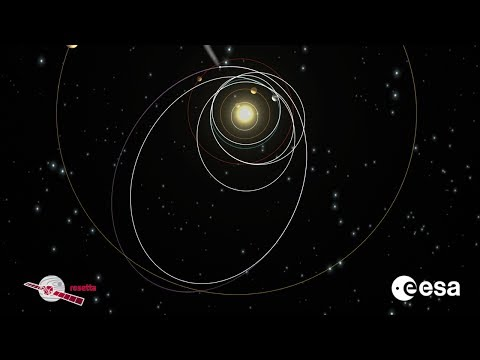

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("iEQuE5N3rwQ", width=800, height=600)

## poliastro

<img src="logo_text.svg" alt="poliastro" width="500" style="float:right"></img>

* **Python puro**, acelerado con **numba** (~mismo orden de magnitud que Fortran)
* **Licencia MIT** (permisiva)
* Manejo de unidades físicas y escalas temporales gracias a Astropy
* Conversión entre varias representaciones orbitales
* Propagación analítica y numérica
* Documentación molona 🚀 http://docs.poliastro.space/
* ¡Versión 0.7.0 liberada hace una semana! http://blog.poliastro.space/2017/09/15/2017-09-15-poliastro-070-released-ready-pycones/

<div style="clear:both"></div>

In [2]:
%matplotlib inline
from astropy import units as u
from astropy.time import Time

from poliastro.bodies import Earth
from poliastro.twobody import Orbit
from poliastro.plotting import plot, OrbitPlotter

## _Interlude: Time zones? Hold my beer_

![Escalas temporales](time_scales.png)

In [3]:
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s

ss = Orbit.from_vectors(Earth, r, v, Time.now())
ss

7283 x 10293 km x 153.2 deg orbit around Earth (♁)

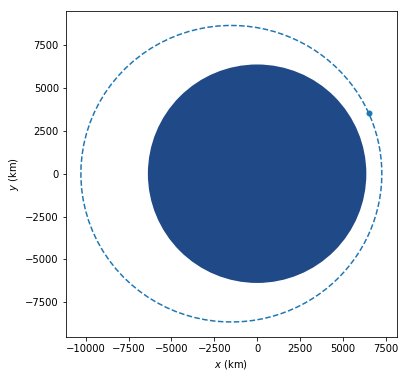

In [4]:
plot(ss);

## Cuerpos cercanos

También conocidos como NEOs, del inglés Near Earth Objetcs.
> Son cometas y asteroides a los que las  fuerzas gravitatorias del Sistema Solar han atraído a las cercanías de la Tierra.

Existen más de 16000.

### Tipos de NEOs
![tipos de neos](neo_orbit_types.jpg)

### ¿Por qué NEOs?
* Aplicaciones en investigación científica.

![Mining the Sky](mining_the_sky.jpg)

* Riesgo de impacto contra la Tierra.
![impactos sobre la Tierra](bolide_events.jpg)

![NEOShield](neoshield.jpg)

* ¿ Y por qué no? :P

## poliastro y su paquete NEOS

Como parte del proyecto SOCIS, se ha añadido en la versión 0.7 de poliastro un paquete NEOS. Está dividido en dos módulos:

In [5]:
from poliastro.neos import neows, dastcom5

## Módulo NEOWS

El módulo se basa en [este Servicio Web de la NASA](https://api.nasa.gov/api.html#NeoWS).

![Interfaz web NEOWS](interfaz_neows.png)

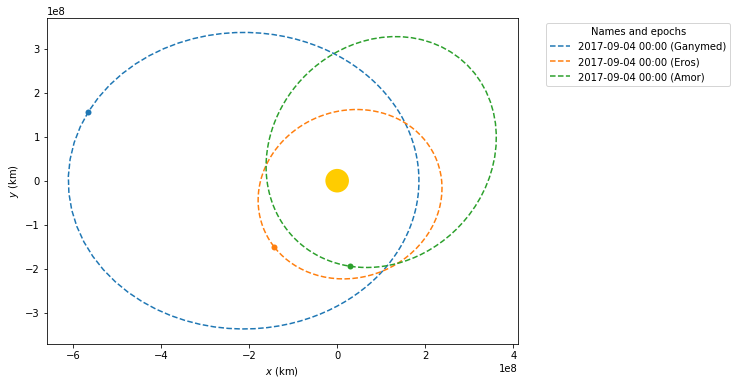

In [6]:
eros = neows.orbit_from_name('Eros')
ganymed = neows.orbit_from_name('1036') # Ganymed IAU number
amor = neows.orbit_from_name('2001221') # Amor SPK-ID

frame = OrbitPlotter()
frame.plot(ganymed, label='Ganymed')
frame.plot(eros, label='Eros')
frame.plot(amor, label='Amor')

## ¿Cómo funciona?

![SBDB](sbdb.png)

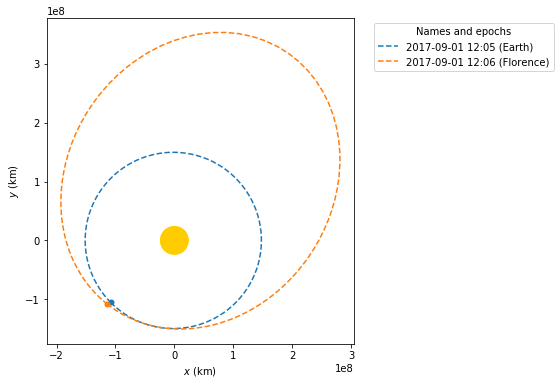

In [7]:
florence = neows.orbit_from_name('florence')
earth = Orbit.from_body_ephem(Earth, epoch)

epoch = Time('2017-09-01 12:05:50', 'utc')
time_diff = epoch.tdb - florence.epoch.tdb
florence = florence.propagate(time_diff)

frame = OrbitPlotter()
frame.plot(earth, label='Earth')
frame.plot(florence, label='Florence')

## Módulo DASTCOM5

Trabaja con la base de datos DASTCOM5, mantenida por la NASA y el JPL. Contiene datos sobre cometas y asteroides.
![dastcom5 index](dastcom5_index.png)

La base de datos viene en un zip de unos ~230 MB que se puede descargar [a mano](ftp://ssd.jpl.nasa.gov/pub/ssd/dastcom5.zip) y descomprimir en `~/.poliastro`, o, más fácil, se puede usar una función de poliastro:
```Python
dastcom5.download_dastcom5()
```

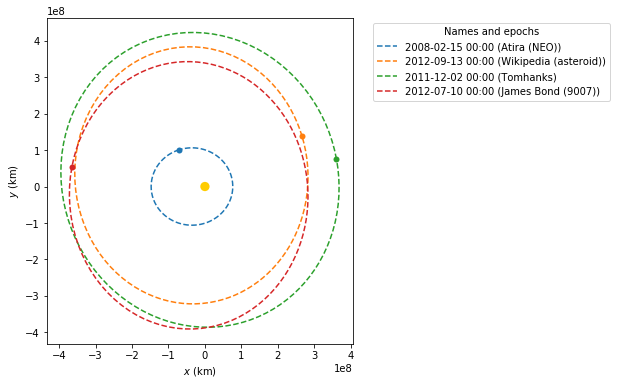

In [8]:
atira = dastcom5.orbit_from_name('atira')[0] # NEO
wikipedia = dastcom5.orbit_from_name('wikipedia')[0] # Asteroid, but not NEO.
tomhanks = dastcom5.orbit_from_name('tomhanks')[0]
jamesbond = dastcom5.orbit_from_name('9007')[0]

frame = OrbitPlotter()
frame.plot(atira, label='Atira (NEO)')
frame.plot(wikipedia, label='Wikipedia (asteroid)')
frame.plot(tomhanks, label='Tomhanks')
frame.plot(jamesbond, label='James Bond (9007)')

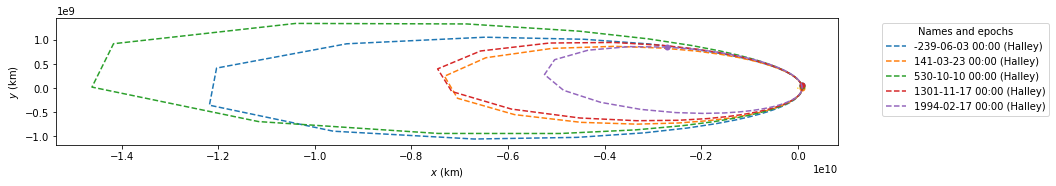

In [9]:
halleys = dastcom5.orbit_from_name('1P')

frame = OrbitPlotter()
frame.plot(halleys[0], label='Halley')
frame.plot(halleys[5], label='Halley')
frame.plot(halleys[10], label='Halley')
frame.plot(halleys[20], label='Halley')
frame.plot(halleys[-1], label='Halley')

El módulo dastcom5 también proporciona las bases de datos completas, en forma de `ndarray`. Así, se puede consultar información sobre cada asteroide y cometa. Para saber la lista de parámetros disponibles, se puede ver el `dtype`. También hay una lista con una explicación de cada parámetro en la [documentación](http://docs.poliastro.space/en/latest/dastcom5%20parameters.html).

In [10]:
ast_db = dastcom5.asteroid_db()
comet_db = dastcom5.comet_db()

ast_db.dtype.names[:20] # They are more than 100, but that would be too much lines in this notebook :P

('NO',
 'NOBS',
 'OBSFRST',
 'OBSLAST',
 'EPOCH',
 'CALEPO',
 'MA',
 'W',
 'OM',
 'IN',
 'EC',
 'A',
 'QR',
 'TP',
 'TPCAL',
 'TPFRAC',
 'SOLDAT',
 'SRC1',
 'SRC2',
 'SRC3')

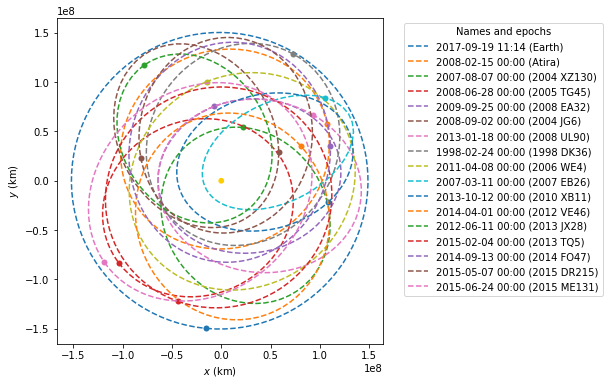

In [11]:
aphelion_condition = 2 * ast_db['A'] - ast_db['QR'] < 0.983
axis_condition = ast_db['A'] < 1.3 
atiras = ast_db[aphelion_condition & axis_condition]

earth = Orbit.from_body_ephem(Earth)

frame = OrbitPlotter()
frame.plot(earth, label='Earth')

for i in range(len(atiras)):
    record = atiras['NO'][i]
    label = atiras['ASTNAM'][i].decode().strip() # DASTCOM5 strings are binary
    ss = dastcom5.orbit_from_record(record)
    frame.plot(ss, label=label)

In [12]:
db = dastcom5.entire_db()

db[db.NAME == 'Halley']

,NUMBER,NOBS,OBSFRST,OBSLAST,EPOCH,CALEPOCH,MA,W,OM,IN,EC,A,QR,TP,TPCAL,TPFRAC,SOLDAT,DESIG,IREF,NAME
2687,2688,1732,19500814,20160827,2455701.5,20110520.0,22.786977,183.484408,95.422520,3.454589,0.143215,3.165183,2.711882,2.455571e+06,2.011011e+07,0.309024,2.457850e+06,1982 HG1,23,Halley
737341,900001,161,0,0,1633920.5,-2390607.0,0.165294,88.110000,30.810000,163.470000,0.967600,18.067901,0.585400,1.633908e+06,-2.390525e+06,0.620000,0.000000e+00,1P,SAO/-239,Halley
737342,900002,161,0,0,1661840.5,-1631115.0,0.031113,89.110000,32.060000,163.700000,0.967700,18.095975,0.584500,1.661838e+06,-1.631113e+06,0.070000,0.000000e+00,1P,SAO/-163,Halley
737343,900003,161,0,0,1689880.5,-860823.0,0.211345,90.778000,34.018000,163.340000,0.967680,18.118812,0.585600,1.689864e+06,-8.608065e+05,0.962000,0.000000e+00,1P,SAO/-86,Halley
737344,900004,161,0,0,1717320.5,-111008.0,359.963217,92.559000,35.904000,163.589000,0.967370,17.995709,0.587200,1.717323e+06,-1.110108e+05,0.349000,0.000000e+00,1P,SAO/-11,Halley
737345,900005,161,0,0,1745200.5,660206.0,0.142118,92.652000,36.129000,163.577000,0.967550,18.030817,0.585100,1.745189e+06,6.601260e+05,0.460000,0.000000e+00,1P,SAO/66,Halley
737346,900006,161,0,0,1772640.5,1410324.0,0.019990,93.694000,37.219000,163.437000,0.967840,18.132463,0.583140,1.772639e+06,1.410322e+06,0.934000,0.000000e+00,1P,SAO/141,Halley
737347,900007,161,0,0,1800800.5,2180429.0,359.761537,94.147000,37.908000,163.574000,0.967980,18.159588,0.581470,1.800819e+06,2.180518e+06,0.223000,0.000000e+00,1P,SAO/218,Halley
737348,900008,161,0,0,1828920.5,2950425.0,0.057332,95.241000,39.111000,163.367000,0.968750,18.429120,0.575910,1.828916e+06,2.950420e+06,0.898000,0.000000e+00,1P,SAO/295,Halley
737349,900009,161,0,0,1857720.5,3740301.0,0.158377,96.510000,40.579000,163.542000,0.968590,18.375995,0.577190,1.857708e+06,3.740216e+06,0.842000,0.000000e+00,1P,SAO/374,Halley


## SOCIS y conclusiones

...